<div style="background-color:lightblue; padding:10px; border-radius:5px; border:1px solid black;">
    <h1 style="color:black; text-align:center;">Predicting Pneumonia in Chest X-Ray Images</h1>
    <h3 style="color:black; text-align:center;">An exploration on the efficacy of different modeling techniques</h3>
    <h3 style="color:gray; text-align:center;">Final Models for Pneumonia Detection in X-Rays</h3>
</div>

# Introduction

## Problem Statement: 

- **Evaluating the Effectiveness of Machine Learning Techniques for Bacterial and Viral Pneumonia Detection in Chest X-Ray Images**

## Research Questions:

- What is the most effective and efficient model for predicting pneumonia diagnoses from chest x-ray images?

- _Follow Up_: Can we accurately distinguish between viral and bacterial pneumonia via chest x-ray images?

## Data Overview:

- Source: The data source for this study was found on [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data) and originally comes from the academic research dataset:
    - Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018). “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification,” Mendeley Data, V2, [doi: 10.17632/rscbjbr9sj.2](https://doi.org/10.17632/rscbjbr9sj.2).<br>
- Cross-Validation Split: The data from Kaggle is already organized into training, testing, and validation sets.
    - There are 5,190 images in the cleaned training set, 618 images in the cleaned testing set, and 16 in the cleaned validation set.
- Labels:
    - NORMAL, PNEUMONIA
    - PNEUMONIA is further broken down into
        - Viral
        - Bacterial  

# Data Preprocessing and Exploratory Data Analysis

This is a review of the data cleaning and analysis done in the document, "EDA and Initial Model.ipynb."

## Data Cleaning

The raw training data had 5,216 images, while the raw testing set had 624 images, and the raw validation set had 16 images. Before cleaning the data set label distribution was as follows:

**Training Set**

- PNEUMONIA: 3,875
    - Viral: 1,345
    - Bacterial: 2,530 
- NORMAL: 1,341

<br>

**Testing Set**

- PNEUMONIA: 390
    - Viral: 148
    - Bacterial: 242
- NORMAL: 234

<br>

**Validation Set**

- PNEUMONIA: 8
    - Viral: 0
    - Bacterial: 8 
- NORMAL: 8

### Duplicates Removed

Images were converted to bytes and then the MD5 hash was computed and returned as a hexadecimal string for comparison. Then a function was written to compare the hash_values of all images. There were a total of 32 duplicates identified (26 in the training and 6 in the test set).

After the duplicates were removed we were left with 5,190 images in the training set and 618 images in the test set. The validation set did not have any duplicates.

### Image Quality Check

There were no corrupt or unreadable images found across all datasets.

### Image Format and Conversion

Every images format was checked and if the format was not grayscale it was converted to grayscale. There were 283 images that were being stored as RGB images, but were grayscale. Again, the these images were converted to grayscale for consistency.

### Label/Response Variable Imabalance

In the data cleaning and preprocessing step, it became clear that there was class imbalance within the image labels. The training set contained 74.18% PNEUMONIA cases and 25.82% NORMAL cases. The testing set contained 62.62% PNEUMONIA cases and 37.38%. Finally, the validation set had 50% PNEUMONIA cases and 50% NORMAL cases. Clearly, there is some class imbalance in the training and testing sets. However, since we are training a model to diagnosis/detect PNEUMONIA we want to err on the side of caution by reducing the number of false negatives in favor of false positives (similar to how the COVID-19 tests are evaluated for efficacy).

![alt text](images/class_distribution.png "Class Distribution")

Further, the PNEUMONIA cases all looked to be predominantly bacterial pneumonia. In fact, the validation set has only bacterial pneumonia cases.

![alt text](images/pneumonia_distribution.png "Pneumonia Distribution")

## Data Analysis and Feature Engineering

### Statistical and texture-based features:

#### Gray-Level Co-Occurrence Matrix (GLCM)

![alt text](images/GLCM_values_by_main_classes.png "GLCM by Class")

#### Fourier Transform for frequency-based features

![alt text](images/log10_fourier_transform_energy_main_classes.png "Log 10 Fourier Transform Energy")

#### Edge Strength & Blurriness analysis

Edge strength appears to show some difference between the PNEUMONIA class and the NORMAL class of X-rays.
![alt text](images/edge_strength_main_classes.png)

There did not appear to be a difference in the Laplacian variance, which tells us how blurry an image is, between the classes.

#### Brightness & Contrast distribution

![alt text](images/brightness_by_main_classes.png)

![alt text](images/contrast_by_main_classes.png)

### Dimensionality Reduction (PCA):

![alt text](images/optimal_number_of_PCA_components.png)

Number of PCA components needed for 95% variance: 688

# Model Selections and Training

## Baseline Models (for comparison)

### Dummy Classifier

![alt text](images/Confusion_Matrix_for_Dummy_Classifier.png)

Dummy Classifier Accuracy, Precision, Recall, and F1-Score:

- **TP (True Positives - Pneumonia correctly identfied):** 387
- **FN (False Negatives - Pneumonia misclassified as Normal):** 0
- **TN (True Negatives - Normal correctly identified):** 0
- **FP (False Positives - Normal misclassified as Pneumonia):** 231

$\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+FP+TN+FN}}$
$ = \frac{387+0}{387+231+0+0} = \frac{387}{618} \approx 0.6262$

$\text{Recall} =  \frac{\text{TP}}{\text{TP+FN}}$
$ = \frac{387}{387+0}=\frac{387}{387} = 1.0000$

$\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}$
$ = \frac{387}{387+231}=\frac{387}{618} \approx 0.6262$

$\text{F1-Score} = 2 \times \frac{\text{Precision}\times \text{Recall}}{\text{Precision + Recall}}$
$ = 2 \times \frac{0.6262 \times 1.0000}{0.6262+1.000} = 2 \times \frac{0.6262}{1.6262} \approx 0.7701$

### Random Forest Classifier

![alt text](images/Confusion_Matrix_for_Random_Forest_Classifier.png)

Base Random Forest Accuracy, Precision, Recall, and F1-Score:

- **TP (True Positives - Pneumonia correctly identfied):** 386
- **FN (False Negatives - Pneumonia misclassified as Normal):** 1
- **TN (True Negatives - Normal correctly identified):** 40
- **FP (False Positives - Normal misclassified as Pneumonia):** 191

$\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+FP+TN+FN}}$
$ = \frac{386+40}{40+191+386+1} = \frac{426}{618} \approx 0.6893$

$\text{Recall} =  \frac{\text{TP}}{\text{TP+FN}}$
$ = \frac{386}{386+1}=\frac{386}{387} \approx 0.9974$

$\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}$
$ = \frac{386}{386+191}=\frac{386}{577} \approx 0.6690$

$\text{F1-Score} = 2 \times \frac{\text{Precision}\times \text{Recall}}{\text{Precision + Recall}}$
$ = 2 \times \frac{0.6893 \times 0.9974}{0.6893+0.9974} = 2 \times \frac{0.6875}{1.6867} \approx 0.8152$

## Advanced Machine Learning Models

### Import Modules

In [1]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_final = pd.read_csv('data/train_dataset_with_features_with_PCA.csv')
test_final = pd.read_csv('data/test_dataset_with_features_with_PCA.csv')
val_final = pd.read_csv('data/val_dataset_with_features_with_PCA.csv')

In [5]:
train_final = train_final.set_index("image_path")
test_final = test_final.set_index("image_path")
val_final = val_final.set_index("image_path")

In [7]:
train_final.head()

,label,hash,disease_type,Brightness,Contrast,GLCM_Contrast,GLCM_Correlation,GLCM_Energy,GLCM_Homogeneity,Edge_Strength,...,PC679,PC680,PC681,PC682,PC683,PC684,PC685,PC686,PC687,PC688
image_path,,,,,,,,,,,,,,,,,,,,,
chest_xray/train/NORMAL/NORMAL2-IM-0927-0001.jpeg,NORMAL,37d9c9eae7fc6a4356149e071e886a52,NORMAL,124.391030,56.330762,72.311711,0.988587,0.020208,0.186281,359.797049,...,5.710115,-5.426740,0.858471,8.745654,-2.786414,7.305975,5.411600,-1.328738,-0.506833,-1.891944
chest_xray/train/NORMAL/NORMAL2-IM-1056-0001.jpeg,NORMAL,5492ab6358ac859e0090e2fce26e5804,NORMAL,115.710751,56.844688,18.847689,0.997077,0.081340,0.369210,239.319756,...,0.531881,-1.145440,-0.001716,-3.636283,2.365074,-1.042596,-8.813372,6.350190,-3.025702,-0.927665
chest_xray/train/NORMAL/IM-0427-0001.jpeg,NORMAL,dee0187150d3ad976e0c9af6dcee3cf3,NORMAL,133.991183,65.503709,17.790796,0.997924,0.083593,0.368610,240.476092,...,-0.281523,2.976487,-0.686639,-1.594396,-3.327478,2.298610,-0.044162,-1.378504,4.637707,-4.412302
chest_xray/train/NORMAL/NORMAL2-IM-1260-0001.jpeg,NORMAL,c38677052671989827c12a98f4bd1b1d,NORMAL,111.488999,68.965235,18.185661,0.998087,0.142800,0.396954,242.253012,...,4.985089,-2.175166,6.402116,-3.105779,2.653440,2.036490,-3.881019,1.110390,-1.826112,0.992524
chest_xray/train/NORMAL/IM-0656-0001-0001.jpeg,NORMAL,08eaa62c1628c0c1aaea38616c338041,NORMAL,148.148118,60.029570,17.674789,0.997543,0.053182,0.321715,231.020273,...,2.647096,2.504465,3.458917,1.370644,-2.563666,0.318677,-0.754188,-0.677803,2.465632,-0.665952


In [9]:
# Define features (drop label, hash, disease_type)
drop_columns = ["label", "hash", "disease_type"]
X_train = train_final.drop(columns=drop_columns)
y_train = train_final["label"]

X_test = test_final.drop(columns=drop_columns)
y_test = test_final["label"]

X_val = val_final.drop(columns=drop_columns)
y_val = val_final["label"]

# Check data shape
print(f"Training set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test set: {X_test.shape}, Labels: {y_test.shape}")
print(f"Validation set: {X_val.shape}, Labels: {y_val.shape}")

Training set: (5190, 697), Labels: (5190,)
Test set: (618, 697), Labels: (618,)
Validation set: (16, 697), Labels: (16,)


### Randomized Search Random Forest

In [11]:
# Initialize and train Random Forest model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate accuracy
print(f"Random Forest Accuracy: {rf_clf.score(X_test, y_test):.4f}")

Random Forest Accuracy: 0.6893


In [13]:
# Define parameter distributions
param_dist = {
    'n_estimators': np.arange(100, 500, 50),  # Range of trees
    'max_depth': [10, 20, 30, None], 
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 10, 2),
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=20,  # Number of random samples
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Run Randomized Search
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy: ", random_search.best_score_)

# Evaluate on test set
best_rf = random_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print(f"Best Random Forest Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=  10.4s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=18, n_estimators=300; total time= 7.7min
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=450; total time=17.3min
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   9.9s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=5, min_samples_split=18, n_estimators=300; total time= 7.9min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=200; total time=  11.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=16, n_estimators=2

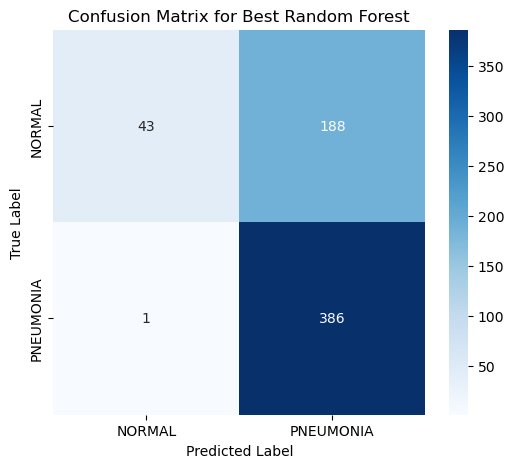

In [16]:
y_pred_best_rf = best_rf.predict(X_test)

# Compute confusion matrix
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_rf, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Best Random Forest")
plt.savefig("images/Confusion_Matrix_for_Best_Random_Forest.png")
plt.show()

In [ ]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))

Best Random Forest Accuracy, Precision, Recall, and F1-Score:

- **TP (True Positives - Pneumonia correctly identfied):** 386
- **FN (False Negatives - Pneumonia misclassified as Normal):** 1
- **TN (True Negatives - Normal correctly identified):** 43
- **FP (False Positives - Normal misclassified as Pneumonia):** 188

$\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+FP+TN+FN}}$
$ = \frac{386+43}{386+188+43+1} = \frac{429}{618} \approx 0.6942$

$\text{Recall} =  \frac{\text{TP}}{\text{TP+FN}}$
$ = \frac{386}{386+1}=\frac{386}{387} \approx 0.9974$

$\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}$
$ = \frac{386}{386+188}=\frac{386}{574} \approx 0.6727$

$\text{F1-Score} = 2 \times \frac{\text{Precision}\times \text{Recall}}{\text{Precision + Recall}}$
$ = 2 \times \frac{0.6727 \times 0.9974}{0.6727+0.9974} = 2 \times \frac{0.6710}{1.6701} \approx 0.8037$

### Support Vector Machine (SVM)

In [35]:
#Instantiate scaler
svm_scaler = StandardScaler()

# Fit on the train data and transform test and validation sets.
X_train_scaled = svm_scaler.fit_transform(X_train)
X_test_scaled = svm_scaler.transform(X_test)
X_val_scaled = svm_scaler.transform(X_val)

In [37]:
# Instantiate a baseline SVC model
svm_clf = SVC(random_state=42)

# Train the model
svm_clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

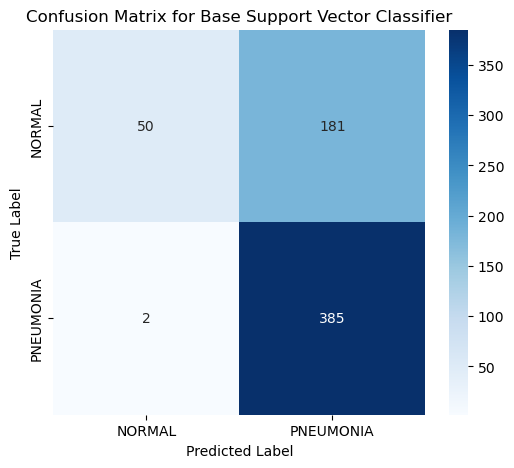

In [39]:
# Make predictions
y_pred_svm = svm_clf.predict(X_test_scaled)

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_clf.classes_, yticklabels=svm_clf.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Base Support Vector Classifier")
plt.savefig("images/Confusion_Matrix_for_Support_Vector_Classifier.png")
plt.show()

In [41]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.96      0.22      0.35       231
   PNEUMONIA       0.68      0.99      0.81       387

    accuracy                           0.70       618
   macro avg       0.82      0.61      0.58       618
weighted avg       0.79      0.70      0.64       618



Base Support Vector Classifier Accuracy, Precision, Recall, and F1-Score:

- **TP (True Positives - Pneumonia correctly identfied):** 385
- **FN (False Negatives - Pneumonia misclassified as Normal):** 2
- **TN (True Negatives - Normal correctly identified):** 50
- **FP (False Positives - Normal misclassified as Pneumonia):** 181

$\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+FP+TN+FN}}$
$ = \frac{385+50}{385+181+50+2} = \frac{435}{618} \approx 0.7039$

$\text{Recall} =  \frac{\text{TP}}{\text{TP+FN}}$
$ = \frac{385}{385+2}=\frac{385}{387} \approx 0.9948$

$\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}$
$ = \frac{385}{385+181}=\frac{385}{566} \approx 0.6802$

$\text{F1-Score} = 2 \times \frac{\text{Precision}\times \text{Recall}}{\text{Precision + Recall}}$
$ = 2 \times \frac{0.6802 \times 0.9948}{0.6802+0.9948} = 2 \times \frac{0.6767}{1.675} \approx 0.808$

### Randomized Search SVM

In [44]:
# Define parameter distributions
param_dist_svm = {
    'C': stats.uniform(0.1, 100),  # Search between 0.1 and 100
    'gamma': stats.uniform(0.0001, 1),  # Range for RBF kernel influence
    'kernel': ['rbf', 'linear', 'poly']  # Test different kernel types
}

# Initialize SVM model
svm_clf = SVC(random_state=42)

# Initialize RandomizedSearchCV
random_search_svm = RandomizedSearchCV(
    estimator=svm_clf,
    param_distributions=param_dist_svm,
    n_iter=20,  # Try 20 random combinations
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=0,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit Randomized Search
random_search_svm.fit(X_train_scaled, y_train)

# Print best parameters
print("Best SVM Parameters:", random_search_svm.best_params_)

# Evaluate best model
best_svm = random_search_svm.best_estimator_
test_accuracy_svm = best_svm.score(X_test_scaled, y_test)
print(f"Best SVM Test Accuracy: {test_accuracy_svm:.4f}")

Best SVM Parameters: {'C': 78.06910002727692, 'gamma': 0.596950157946487, 'kernel': 'linear'}
Best SVM Test Accuracy: 0.6958


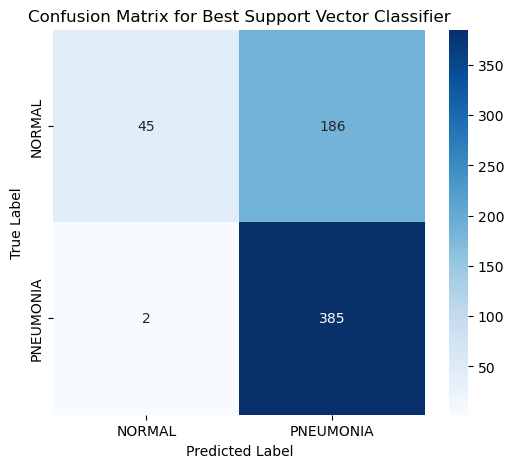

In [46]:
y_pred_best_svm = best_svm.predict(X_test_scaled)

# Compute confusion matrix
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_best_svm, annot=True, fmt="d", cmap="Blues", xticklabels=best_svm.classes_, yticklabels=best_svm.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Best Support Vector Classifier")
plt.savefig("images/Confusion_Matrix_for_Best_Support_Vector_Classifier.png")
plt.show()

In [48]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best_svm))

Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.96      0.19      0.32       231
   PNEUMONIA       0.67      0.99      0.80       387

    accuracy                           0.70       618
   macro avg       0.82      0.59      0.56       618
weighted avg       0.78      0.70      0.62       618



Best Support Vector Classifier Accuracy, Precision, Recall, and F1-Score:

- **TP (True Positives - Pneumonia correctly identfied):** 385
- **FN (False Negatives - Pneumonia misclassified as Normal):** 2
- **TN (True Negatives - Normal correctly identified):** 45
- **FP (False Positives - Normal misclassified as Pneumonia):** 186

$\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+FP+TN+FN}}$
$ = \frac{385+45}{385+186+45+2} = \frac{430}{618} \approx 0.6958$

$\text{Recall} =  \frac{\text{TP}}{\text{TP+FN}}$
$ = \frac{385}{385+2}=\frac{385}{387} \approx 0.9948$

$\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}$
$ = \frac{385}{385+186}=\frac{369}{571} \approx 0.6743$

$\text{F1-Score} = 2 \times \frac{\text{Precision}\times \text{Recall}}{\text{Precision + Recall}}$
$ = 2 \times \frac{0.6743 \times 0.9948}{0.6743+0.9948} = 2 \times \frac{0.6708}{1.6691} \approx 0.8038$

### Ensemble Learning (3 Random Forests with Hard Voting)

In [50]:
# Define best hyperparameters from previous tuning
best_parameters = {
    'n_estimators': 450,
    'max_depth': 30,
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'max_features': None,
    'bootstrap': True
}

# Define different random states for diversity
random_states = [42, 84, 126]

# Create multiple Random Forest models with different random states
rf_models = [
    ('rf_' + str(i), RandomForestClassifier(**best_parameters, random_state=seed))
    for i, seed in enumerate(random_states)
]

# Define Voting Classifier (majority voting)
voting_rf = VotingClassifier(
    estimators=rf_models,
    voting='hard'  # 'hard' for majority vote, 'soft' for probability averaging
)

# Train the ensemble model
voting_rf.fit(X_train, y_train)

# Predict on test data
y_pred_voting = voting_rf.predict(X_test)

print("Voting Random Forest Accuracy:", accuracy_score(y_test, y_pred_voting))

Voting Random Forest Accuracy: 0.6941747572815534


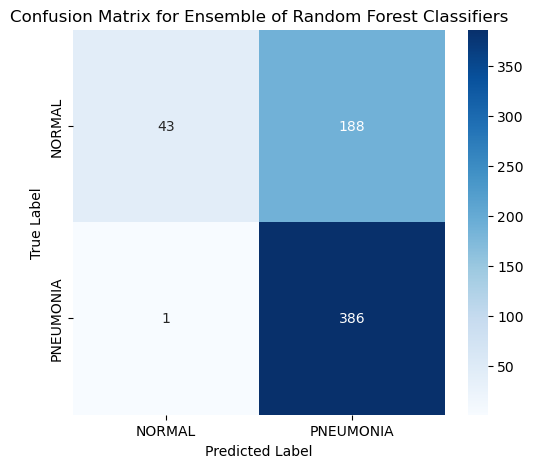

In [52]:
# Compute confusion matrix
cm_voting_rfs = confusion_matrix(y_test, y_pred_voting)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_voting_rfs, annot=True, fmt="d", cmap="Blues", xticklabels=voting_rf.classes_, yticklabels=voting_rf.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Ensemble of Random Forest Classifiers")
plt.savefig("images/Confusion_Matrix_for_Ensemble_of_Random_Forest_Classifiers.png")
plt.show()

In [54]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))


Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.98      0.19      0.31       231
   PNEUMONIA       0.67      1.00      0.80       387

    accuracy                           0.69       618
   macro avg       0.82      0.59      0.56       618
weighted avg       0.79      0.69      0.62       618



Ensemble of Random Forest Classifiers Accuracy, Precision, Recall, and F1-Score:

- **TP (True Positives - Pneumonia correctly identfied):** 386
- **FN (False Negatives - Pneumonia misclassified as Normal):** 1
- **TN (True Negatives - Normal correctly identified):** 43
- **FP (False Positives - Normal misclassified as Pneumonia):** 188

$\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+FP+TN+FN}}$
$ = \frac{386+43}{386+188+43+1} = \frac{429}{618} \approx 0.6942$

$\text{Recall} =  \frac{\text{TP}}{\text{TP+FN}}$
$ = \frac{386}{386+1}=\frac{386}{387} \approx 0.9974$

$\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}$
$ = \frac{386}{386+188}=\frac{386}{574} \approx 0.6725$

$\text{F1-Score} = 2 \times \frac{\text{Precision}\times \text{Recall}}{\text{Precision + Recall}}$
$ = 2 \times \frac{0.6725 \times 0.9974}{0.6725+0.9974} = 2 \times \frac{0.6708}{1.6699} \approx 0.803$

### Custom Convolutional Neural Network (CNN)

*Please note that all models below were built and trained in the 'Final CNN Modeling.ipynb' notebook.

- First Convolutional Block
    - 64 filters, ReLU activation, L2 Regularization (to prevent overfitting)
    - Pooling layer
- Second Convolutional Block
    - 128 filters, ReLU activation, L2 Regulatization (to prevent overfitting)
    - Pooling Layer
- Third Convolutional Block
    - 256 filters, ReLU activation, L2 Regularization (to prevent overfitting)
    - Pooling Layer
- Flattening Layer
- Fully Connected Dense Layer
    - 256 neurons, ReLU activation, L2 Regularization (to prevent overfitting)
- Dropout
    - 50% of neurons dropped to prevent overfitting
- Output Layer
    - Single sigmoid neuron
 
This is just a simple CNN I built based off of similar architecture I found through some quick research. The regularization techniques were added as I noticed the function was learning too quickly and overfitting on the training set.

Lastly, I used a dynamic learning rate that reduced everytime the testing loss did not improve for 3 iterations.

#### Confusion Matrix for Custom CNN

![alt text](images/CNN_Model_Classification_Report.png)

Base CNN Accuracy, Precision, Recall, and F1-Score:

- **TP (True Positives - Pneumonia correctly identfied):** 360
- **FN (False Negatives - Pneumonia misclassified as Normal):** 27
- **TN (True Negatives - Normal correctly identified):** 186
- **FP (False Positives - Normal misclassified as Pneumonia):** 45

$\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+FP+TN+FN}}$
$ = \frac{360+186}{360+45+186+27} = \frac{546}{618} \approx 0.8835$

$\text{Recall} =  \frac{\text{TP}}{\text{TP+FN}}$
$ = \frac{360}{360+27}=\frac{360}{387} \approx 0.9302$

$\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}$
$ = \frac{360}{360+45}=\frac{360}{405} \approx 0.8889$

$\text{F1-Score} = 2 \times \frac{\text{Precision}\times \text{Recall}}{\text{Precision + Recall}}$
$ = 2 \times \frac{0.8889 \times 0.9302}{0.8889+0.9302} = 2 \times \frac{0.8269}{1.8191} \approx 0.9091$

### Pretrained CNN VGG16

The VGG16 model was built for ImageNet. The architecture is too complex to go into for now, but this is a common pretrained classification CNN. More information on this model can be found [here](https://arxiv.org/abs/1409.1556). 

We do add a few layers to the bottom that we used in the first CNN model. This again is to discourage overfitting.

![alt text](images/VGG16_Model_Classification_Report.png)

VGG16 CNN Accuracy, Precision, Recall, and F1-Score:

- **TP (True Positives - Pneumonia correctly identfied):** 381
- **FN (False Negatives - Pneumonia misclassified as Normal):** 6
- **TN (True Negatives - Normal correctly identified):** 205
- **FP (False Positives - Normal misclassified as Pneumonia):** 26

$\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+FP+TN+FN}}$
$ = \frac{381+205}{381+26+205+6} = \frac{586}{618} \approx 0.9482$

$\text{Recall} =  \frac{\text{TP}}{\text{TP+FN}}$
$ = \frac{381}{381+6}=\frac{381}{387} \approx 0.9845$

$\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}$
$ = \frac{381}{381+26}=\frac{381}{407} \approx 0.9361$

$\text{F1-Score} = 2 \times \frac{\text{Precision}\times \text{Recall}}{\text{Precision + Recall}}$
$ = 2 \times \frac{0.9361 \times 0.9845}{0.9361+0.9845} = 2 \times \frac{0.9216}{1.9206} \approx 0.9597$

### Pretrained CNN DenseNet121

The DenseNet121 is another model that was built for ImageNet. The architecture is too complex to go into for now, but this is a common pretrained classification CNN. More information on this model can be found [here](https://arxiv.org/abs/1608.06993). 

We do add a few layers to the bottom that we used in the first CNN model. This again is to discourage overfitting.

![alt text](images/DenseNet121_Model_Classification_Report.png)

DenseNet121 CNN Accuracy, Precision, Recall, and F1-Score:

- **TP (True Positives - Pneumonia correctly identfied):** 374
- **FN (False Negatives - Pneumonia misclassified as Normal):** 13
- **TN (True Negatives - Normal correctly identified):** 169
- **FP (False Positives - Normal misclassified as Pneumonia):** 62

$\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+FP+TN+FN}}$
$ = \frac{374+169}{374+62+169+13} = \frac{543}{618} \approx 0.8786$

$\text{Recall} =  \frac{\text{TP}}{\text{TP+FN}}$
$ = \frac{374}{374+13}=\frac{374}{387} \approx 0.9664$

$\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}$
$ = \frac{374}{374+62}=\frac{374}{436} \approx 0.8578$

$\text{F1-Score} = 2 \times \frac{\text{Precision}\times \text{Recall}}{\text{Precision + Recall}}$
$ = 2 \times \frac{0.8578 \times 0.9664}{0.8578+0.9664} = 2 \times \frac{0.8290}{1.8242} \approx 0.9089$

# Model Evaluation & Comparison

## Key Metrics:

### Accuracy, Precision, Recall, F1-score

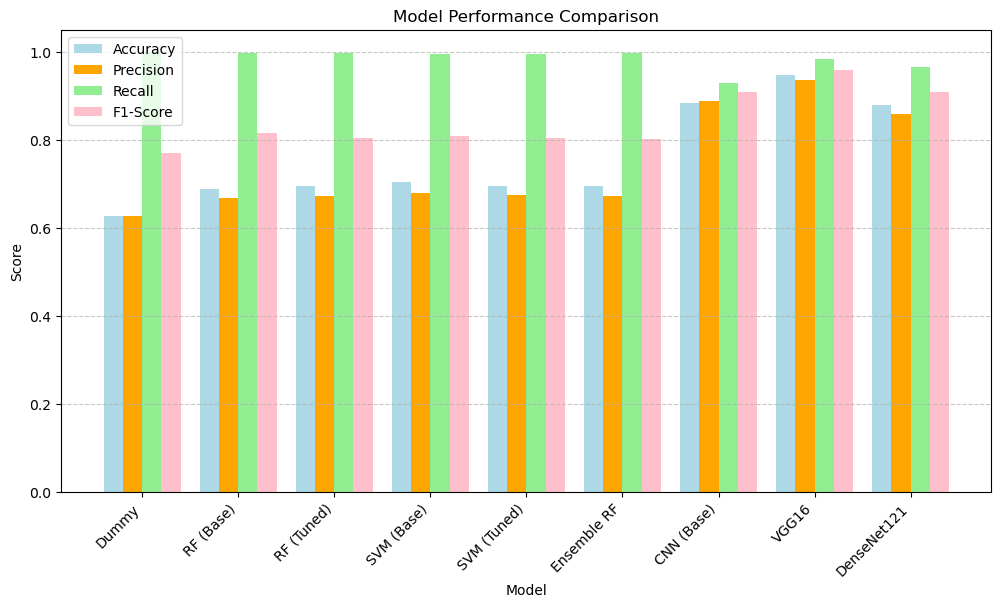

In [101]:
# Model names
models = [
    "Dummy", "RF (Base)", "RF (Tuned)",
    "SVM (Base)", "SVM (Tuned)", "Ensemble RF",
    "CNN (Base)", "VGG16", "DenseNet121"
]

# Metric values
accuracy =  [0.6262, 0.6893, 0.6942,
             0.7039, 0.6958, 0.6942,
             0.8835, 0.9482, 0.8786]
#^done
precision = [0.6262, 0.6690, 0.6727,
             0.6802, 0.6743, 0.6725,
             0.8889, 0.9361, 0.8578]

recall =    [1.0000, 0.9974, 0.9974,
             0.9948, 0.9948, 0.9974,
             0.9302, 0.9845, 0.9664]

f1_score =  [0.7701, 0.8152, 0.8037,
             0.8080, 0.8038, 0.8030,
             0.9091, 0.9597, 0.9089]

# Set width of bars
x = np.arange(len(models))
width = 0.2

# Plot each metric
plt.figure(figsize=(12,6))
plt.bar(x - width*1.5, accuracy, width, label="Accuracy", color="lightblue")
plt.bar(x - width/2, precision, width, label="Precision", color="orange")
plt.bar(x + width/2, recall, width, label="Recall", color="lightgreen")
plt.bar(x + width*1.5, f1_score, width, label="F1-Score", color="pink")

# Formatting
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(ticks=x, labels=models, rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

## Comparison Table:

### Compare Dummy, RF, SVM, and CNN models

In [105]:
# Create a dictionary with the metrics data
final_metrics_dict = {
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1_score
}

# Create the DataFrame
final_metrics_df = pd.DataFrame(final_metrics_dict)

# Display the DataFrame
final_metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Dummy,0.6262,0.6262,1.0000,0.7701
1,RF (Base),0.6893,0.6690,0.9974,0.8152
2,RF (Tuned),0.6942,0.6727,0.9974,0.8037
3,SVM (Base),0.7039,0.6802,0.9948,0.8080
4,SVM (Tuned),0.6958,0.6743,0.9948,0.8038
5,Ensemble RF,0.6942,0.6725,0.9974,0.8030
6,CNN (Base),0.8835,0.8889,0.9302,0.9091
7,VGG16,0.9482,0.9361,0.9845,0.9597
8,DenseNet121,0.8786,0.8578,0.9664,0.9089


### Identify which model performs best on Normal vs. Pneumonia cases

In [111]:
# Suppose your DataFrame is called final_metrics_df
metrics_list = ["Accuracy", "Precision", "Recall", "F1 Score"]

for metric in metrics_list:
    # Get the index of the row with the maximum value for this metric
    best_index = final_metrics_df[metric].idxmax()
    # Retrieve the model name
    best_model = final_metrics_df.loc[best_index, "Model"]
    # Retrieve the best score
    best_score = final_metrics_df.loc[best_index, metric]
    print(f"Best {metric}: {best_model} with {best_score:.4f}")

Best Accuracy: VGG16 with 0.9482
Best Precision: VGG16 with 0.9361
Best Recall: Dummy with 1.0000
Best F1 Score: VGG16 with 0.9597


![alt text](images/VGG16_ROC.png)

VGG16 AUC-ROC: 0.936

#### Best Model: VGG16 Fine-tuned Model

## Feature Importance Analysis

### Best Random Forest Classifier

Top 10 features from Random Forest:
            Feature  Importance
0  GLCM_Homogeneity    0.469882
1    Fourier_Energy    0.210935
2  GLCM_Correlation    0.034583
3       GLCM_Energy    0.027995
4        Blurriness    0.022716
5               PC3    0.020959
6        Brightness    0.019309
7               PC6    0.014671
8               PC9    0.014323
9     Edge_Strength    0.014202


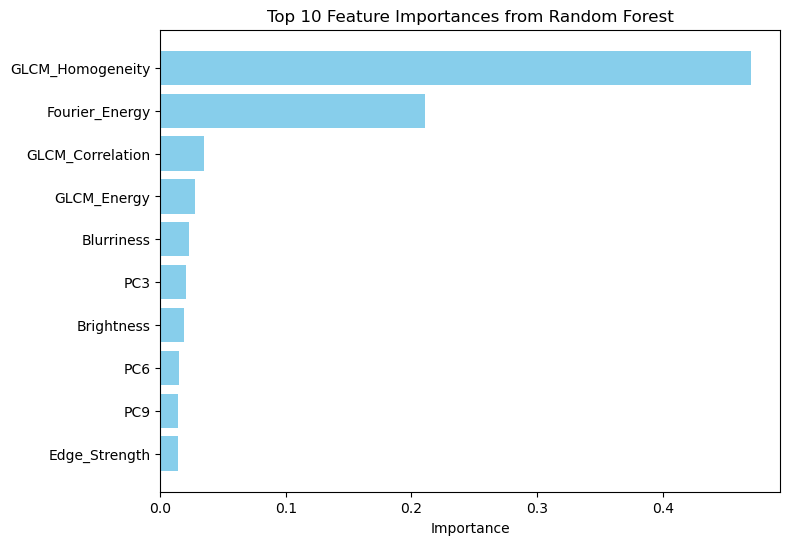

In [137]:
# Number of top features to display
top_n = 10

# Get feature importances from the tuned Random Forest
rf_importances = best_rf.feature_importances_

# Get indices of features sorted by importance (in descending order)
rf_indices = np.argsort(rf_importances)[::-1]

# Extract the top N features and their importances
rf_top_features = X_train.columns[rf_indices][:top_n]
rf_top_importances = rf_importances[rf_indices][:top_n]

# Create a DataFrame for easier viewing
rf_df = pd.DataFrame({
    'Feature': rf_top_features,
    'Importance': rf_top_importances
})

print("Top {} features from Random Forest:".format(top_n))
print(rf_df)

# Plotting the Random Forest feature importances
plt.figure(figsize=(8, 6))
plt.title("Top {} Feature Importances from Random Forest".format(top_n))
plt.barh(rf_top_features, rf_top_importances, color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel("Importance")
plt.show()

Our features we extracted were extremely importance for the random forest classifier alsong with a few principal components.

### Best SVM Classifier

Do to our use of the linear kernel feature importance extraction is relatively straightforward.


Top 10 features from SVM (linear kernel):
            Feature  Coefficient
0  GLCM_Homogeneity     0.995838
1               PC3    -0.764199
2               PC9    -0.624033
3    Fourier_Energy    -0.554598
4               PC6    -0.439544
5               PC2     0.407962
6               PC7     0.393296
7              PC13    -0.329457
8        Blurriness    -0.310584
9              PC14     0.289741


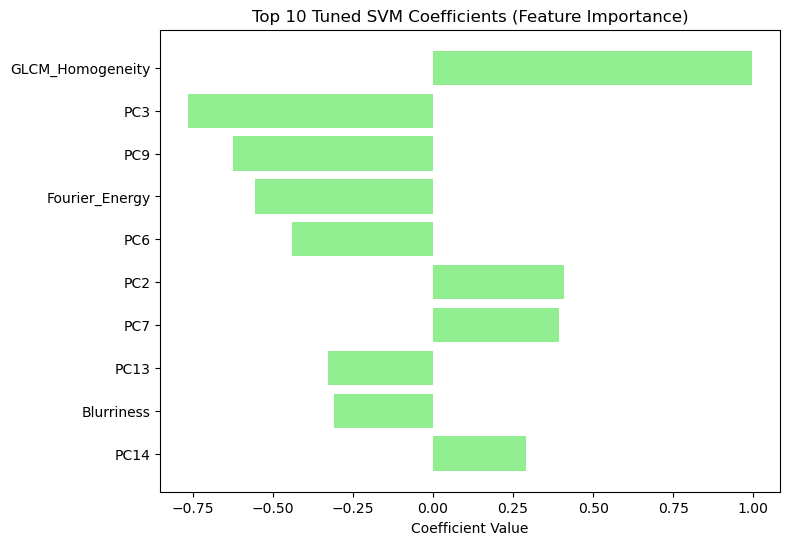

In [139]:
# For a linear SVM, the coefficients indicate feature importance.
# They can be positive or negative so we'll take absolute values to rank importance.
svm_coef = best_svm.coef_[0]
svm_importances = np.abs(svm_coef)

# Get indices of features sorted by absolute coefficient value (in descending order)
svm_indices = np.argsort(svm_importances)[::-1]

# Extract the top N features and the corresponding coefficient values
svm_top_features = X_train.columns[svm_indices][:top_n]
svm_top_coef = svm_coef[svm_indices][:top_n]

# Create a DataFrame for easier viewing
svm_df = pd.DataFrame({
    'Feature': svm_top_features,
    'Coefficient': svm_top_coef
})

print("\nTop {} features from SVM (linear kernel):".format(top_n))
print(svm_df)

# Plotting the SVM coefficients
plt.figure(figsize=(8, 6))
plt.title("Top {} Tuned SVM Coefficients (Feature Importance)".format(top_n))
plt.barh(svm_top_features, svm_top_coef, color='lightgreen')
plt.gca().invert_yaxis()  # Highest coefficient at the top
plt.xlabel("Coefficient Value")
plt.show()

The SVM classifier also had high importance (magnitude of the coefficient) for the features we extracted in our EDA process. We also see that 3 of the same principal components are important here (PC3, PC6, and PC9).

# Findings & Conclusion

Our analysis demonstrated that deep learning techniques, particularly those using transfer learning with pretrained models like VGG16, significantly outperformed traditional machine learning methods. While baseline models (such as the dummy classifier, Random Forest, and Support Vector Machine) achieved accuracies in the 69–70% range, our custom convolutional neural network (CNN) improved this to about 88%. Most notably, the VGG16 model achieved nearly 95% accuracy, with very high recall (over 98%) and excellent precision. This means that the model was not only very good at correctly identifying pneumonia cases but also minimized the risk of missing true cases—a critical factor in medical diagnosis.

## Real-World Impact Discussion

These results indicate that automated chest X-ray analysis using deep learning can provide reliable screening for pneumonia. High recall is especially important in a clinical context, where missing a pneumonia diagnosis could lead to delayed treatment and serious patient outcomes. In essence, our study suggests that leveraging pretrained CNNs can be a viable strategy for developing cost-effective and accurate diagnostic tools that may help improve early detection of pneumonia in healthcare settings.

# Next Steps & Recommendations

**Data Enrichment and Balance:**

- Although our models performed well, the dataset was imbalanced—with a larger proportion of pneumonia cases and limited examples of viral pneumonia. Future work should focus on collecting a more balanced and diverse set of X-ray images. This would help in further refining the model’s ability to distinguish between bacterial and viral pneumonia, a differentiation that is crucial for guiding treatment.

**Model Fine-Tuning and Ensemble Strategies:**

- While transfer learning with VGG16 produced excellent results, additional fine-tuning—possibly by unfreezing more layers or combining multiple CNN architectures—might further boost performance. Exploring ensemble methods that combine the strengths of different CNN architectures could also lead to even more robust predictions.

**Interpretability and Clinical Integration:**

- For real-world deployment, it is important to increase the interpretability of the model’s decisions. Techniques such as Grad-CAM or saliency maps can help visualize which areas of the X-ray the model is focusing on, thereby building trust among clinicians. Additionally, integrating these models into existing clinical workflows and validating them prospectively in a healthcare setting will be key to ensuring practical utility.

**Future Research Directions:**

- Beyond pneumonia detection, the framework and methodology developed here could be extended to other diagnostic imaging challenges. Investigating the use of similar deep learning approaches for detecting other respiratory conditions or even different types of medical imaging (e.g., CT scans) could further broaden the impact of this work.